In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
pip install scikit-posthocs

In [4]:
from scipy import stats
import statsmodels.api as sm
import statistics
from statsmodels.stats import weightstats
#from statsmodels.formula.api import ols
#from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
# function to perform post-hoc test


# import function to perform post-hoc
import scikit_posthocs
from scipy import stats
from statsmodels.stats import weightstats
import random

In [5]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=9f20af6f448806a271b8a9507567b5e38b1bc690461779c32e6f67336e190c99
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [6]:
from pyspark.sql import DataFrame
from pyspark.sql.functions import col, sum as spark_sum
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from scipy import stats

In [7]:
from pyspark.sql import SparkSession,Window

# Create a SparkSession
spark = SparkSession.builder \
    .appName("example") \
    .getOrCreate()

##Pyspark Dataframe Creation

In [8]:
file_path= "/content/drive/MyDrive/Colab Notebooks/Data/DataCoSupplyChainDataset.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the DataFrame
df.show()

+--------+------------------------+-----------------------------+-----------------+------------------+-----------------+------------------+-----------+--------------+--------------+----------------+--------------+--------------+-----------+--------------+-----------------+----------------+--------------+--------------------+----------------+-------------+---------------+-----------+------------+------------+----------+-------------+-----------------+-----------------------+--------+----------------------+-------------------+------------------------+-------------+------------------------+-----------------------+-------------------+------+----------------+----------------------+--------------+--------------------+---------------+-------------+---------------+-------------------+-------------------+--------------------+------------+-------------+--------------+--------------------------+--------------+
|    Type|Days for shipping (real)|Days for shipment (scheduled)|Benefit per order|Sale

In [9]:
df.printSchema()

root
 |-- Type: string (nullable = true)
 |-- Days for shipping (real): integer (nullable = true)
 |-- Days for shipment (scheduled): integer (nullable = true)
 |-- Benefit per order: double (nullable = true)
 |-- Sales per customer: double (nullable = true)
 |-- Delivery Status: string (nullable = true)
 |-- Late_delivery_risk: integer (nullable = true)
 |-- Category Id: integer (nullable = true)
 |-- Category Name: string (nullable = true)
 |-- Customer City: string (nullable = true)
 |-- Customer Country: string (nullable = true)
 |-- Customer Email: string (nullable = true)
 |-- Customer Fname: string (nullable = true)
 |-- Customer Id: integer (nullable = true)
 |-- Customer Lname: string (nullable = true)
 |-- Customer Password: string (nullable = true)
 |-- Customer Segment: string (nullable = true)
 |-- Customer State: string (nullable = true)
 |-- Customer Street: string (nullable = true)
 |-- Customer Zipcode: integer (nullable = true)
 |-- Department Id: integer (nullable = 

####Data Description
####Type: The type of the payment.
####Days for shipping (real): The number of days it took for the order to be shipped after it was placed.
####Days for shipment (scheduled): The number of days it was scheduled to take for the order to be shipped.
####Benefit per order: The benefit (profit) gained from the order.
####Sales per customer: The sales revenue generated per customer.
####Delivery Status: The status of delivery (On Time / Advance / Late / Shipping Issues).
####Late_delivery_risk: An indicator variable that shows whether an order is at risk of being delivered late or not.
####Category Id: The unique identifier for the category.
####Category Name: The name of the category.
####Customer City: The city where the customer resides.
####Customer Country: The country where the customer resides.
####Customer Email: The email address of the customer.
####Customer Fname: The first name of the customer.
####Customer Id: The unique identifier for the customer.
####Customer Lname: The last name of the customer.
####Customer Password: The password for the customer account.
####Customer Segment: The segment to which the customer belongs.
####Customer State: The state where the customer resides.
####Customer Street: The street address where the customer resides.
####Customer Zipcode: The ZIP code where the customer resides.(zip code (short for "Zone Improvement Plan code") is a unique postal code used by postal services in the United States and other countries to facilitate mail delivery to a particular geographic area)
####Department Id: The unique identifier for the department.
####Department Name: The name of the department.
####Latitude: The latitude coordinate of the customer's location.
####Longitude: The longitude coordinate of the customer's location.
####Market: The market region (APAC, EMEA, LATAM, US, Canada).
####Order City: The city where the order was placed.
####Order Country: The country where the order was placed.
####Order Customer Id: The unique identifier for the customer who placed the order.
####Order Date (DateOrders): The date and time when the order was placed.
####Order Id: The unique identifier for the order.
####Order Item Cardprod Id: The unique identifier for the product card.
####Order Item Discount: The amount of discount applied to the product.
####Order Item Discount Rate: The percentage of discount applied to the product.
####Order Item Id: The unique identifier for the order item.
####Order Item Product Price: The price of the product per unit.
####Order Item Profit Ratio: The profit ratio (profit / revenue) of the order item.
####Order Item Quantity: The quantity of the product in the order.
####Sales: The sales revenue generated by the order item.
####Order Item Total: The total price of the order item.
####Order Profit Per Order: The profit gained from the order.
####Order Region: The region where the order was placed.
####Order State: The state where the order was placed.
####Order Status: The status of the order (PENDING, APPROVED, CANCELED, COMPLETE).
####Product Card Id: The unique identifier for the product card
####Product Category Id: The unique identifier for the product category.
####Product Description: The description of the product.
####Product Image: The link to visit and purchase the product.
####Product Name: The name of the product.
####Product Price: The price of the product.
####Product Status: The status of the product stock. If it is 1, the product is not available; if it is 0, the product is available.
####Shipping date (DateOrders): The exact date and time of shipment.
####Shipping Mode: The following shipping modes are presented: Standard Class, First Class, Second Class, and Same Day.

####Possible Target columns
Delivery Status: Predicting the delivery status of an order, i.e. whether an order will be delivered on time or late.

Late_delivery_risk: Predicting the likelihood of late delivery for an order.

Order Profit Per Order: Predicting the profit per order.

Customer Segment: Predicting the customer segment to which a customer belongs.

Order Status: Predicting the status of an order, i.e. whether it will be delivered, cancelled or returned.

## Type conversion to Sting for columns
(Late_delivery_risk,Product Category Id,Customer Id,Department Id,Order Item Cardprod Id,Customer Zipcode)

In [10]:
df = df.withColumn("Late_delivery_risk", col("Late_delivery_risk").cast(StringType()))
df = df.withColumn("Product Category Id", col("Product Category Id").cast(StringType()))
df = df.withColumn("Customer Id", col("Customer Id").cast(StringType()))
df = df.withColumn("Department Id", col("Department Id").cast(StringType()))
df = df.withColumn("Order Item Cardprod Id", col("Order Item Cardprod Id").cast(StringType()))
df = df.withColumn("Customer Zipcode", col("Customer Zipcode").cast(StringType()))

In [11]:
df.printSchema()

root
 |-- Type: string (nullable = true)
 |-- Days for shipping (real): integer (nullable = true)
 |-- Days for shipment (scheduled): integer (nullable = true)
 |-- Benefit per order: double (nullable = true)
 |-- Sales per customer: double (nullable = true)
 |-- Delivery Status: string (nullable = true)
 |-- Late_delivery_risk: string (nullable = true)
 |-- Category Id: integer (nullable = true)
 |-- Category Name: string (nullable = true)
 |-- Customer City: string (nullable = true)
 |-- Customer Country: string (nullable = true)
 |-- Customer Email: string (nullable = true)
 |-- Customer Fname: string (nullable = true)
 |-- Customer Id: string (nullable = true)
 |-- Customer Lname: string (nullable = true)
 |-- Customer Password: string (nullable = true)
 |-- Customer Segment: string (nullable = true)
 |-- Customer State: string (nullable = true)
 |-- Customer Street: string (nullable = true)
 |-- Customer Zipcode: string (nullable = true)
 |-- Department Id: string (nullable = true

## Null Value Check

In [12]:
null_counts = df.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

In [13]:
null_counts.show()

+----+------------------------+-----------------------------+-----------------+------------------+---------------+------------------+-----------+-------------+-------------+----------------+--------------+--------------+-----------+--------------+-----------------+----------------+--------------+---------------+----------------+-------------+---------------+--------+---------+------+----------+-------------+-----------------+-----------------------+--------+----------------------+-------------------+------------------------+-------------+------------------------+-----------------------+-------------------+-----+----------------+----------------------+------------+-----------+------------+-------------+---------------+-------------------+-------------------+-------------+------------+-------------+--------------+--------------------------+-------------+
|Type|Days for shipping (real)|Days for shipment (scheduled)|Benefit per order|Sales per customer|Delivery Status|Late_delivery_risk|Ca

## Fatching Rows containing Null "Customer Zipcode"

In [14]:
column_name = "Customer Zipcode"

In [15]:
null_rows = df.filter(col("`" + column_name + "`").isNull())

In [16]:
null_rows.show()

+-------+------------------------+-----------------------------+-----------------+------------------+----------------+------------------+-----------+--------------------+-------------+----------------+--------------+--------------+-----------+--------------+-----------------+----------------+--------------+---------------+----------------+-------------+---------------+-----------+------------+------------+----------+-------------+-----------------+-----------------------+--------+----------------------+-------------------+------------------------+-------------+------------------------+-----------------------+-------------------+-----------+----------------+----------------------+---------------+--------------------+---------------+-------------+---------------+-------------------+-------------------+--------------------+--------------------+-------------+--------------+--------------------------+--------------+
|   Type|Days for shipping (real)|Days for shipment (scheduled)|Benefit per

## Drop rows with null values in the Customer Zipcode


In [17]:
df = df.dropna(subset=[column_name])

In [18]:
#check for deleted row
null_counts = df.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

In [19]:
null_counts.show()

+----+------------------------+-----------------------------+-----------------+------------------+---------------+------------------+-----------+-------------+-------------+----------------+--------------+--------------+-----------+--------------+-----------------+----------------+--------------+---------------+----------------+-------------+---------------+--------+---------+------+----------+-------------+-----------------+-----------------------+--------+----------------------+-------------------+------------------------+-------------+------------------------+-----------------------+-------------------+-----+----------------+----------------------+------------+-----------+------------+-------------+---------------+-------------------+-------------------+-------------+------------+-------------+--------------+--------------------------+-------------+
|Type|Days for shipping (real)|Days for shipment (scheduled)|Benefit per order|Sales per customer|Delivery Status|Late_delivery_risk|Ca

## Removing Order Zipcode,Product Description (Columns containing all null values)

Reasons for dropping Redundant Features :


---





The '**product description**' column was dropped from the dataset since it contained 100% null values. this column did not provide any useful information for analysis and was therefore deemed irrelevant.


---


The '**Order Zipcode**' column was dropped from the dataset since it contained 86.23% null values. this column did not provide any useful information for analysis and was therefore deemed irrelevant.


In [20]:
columns_to_delete = ["Product Description","Order Zipcode"]

In [21]:
df=df.drop(*columns_to_delete)

## Removing Columns which are not important for us

Reasons for dropping Redundant Features :


---


The columns **'Customer Email', 'Customer Password', 'Customer Fname', and 'Customer Lname'** were dropped from the dataset since they were not expected to have a significant impact on predicting the target variable 'late delivery risk'. These columns were deemed irrelevant to the analysis and were therefore removed."


---


The **"Benefit per order"** is giving the same information as **"order profit per order"** so we drop **"Benefit per order"**.


---


Similarly **"Category Id"** and **"Category Name"** giving the same information about **"Product Category ID"** so we drop the **"Catogory ID"** and **"Category Name"**.


---


Similarly the **"Order Customer ID"** giving the same information as **"Customer Id"** so we drop the **"Order Customer ID"**.


---


Similarly the **"Sales per customer"**giving the same information as **"Order Item Total"** so we drop the **"Sales per customer"**.


---


Similarly Department Name giving the same information as **"Department ID"** so we drop the **"Department Name "**


---


The column **'Customer Street'** was dropped from the dataset since the information it contained was redundant with other columns such as **'Customer Zipcode', 'Customer City', 'Customer State', and 'Customer Country'**.


---
**"Product Images"** do not provide any direct information related to the delivery process and therefore were deemed unnecessary for the analysis. Hence, **'product images'** was removed to simplify the dataset and reduce its complexity."


---

The columns **'order date (DateOrders)'** and **'shipping date (DateOrders)'** were dropped from the dataset, as they contained redundant information with the columns**'Days for shipping(real)'** and **'Days for shipment(scheduled)'** . Since these columns were made by feature engineering and the target variable was **'late delivery risk'** , it was decided to keep the columns **'Days for shipping (real)'** and **'Days for shipment (scheduled)'** for analysis, as they provided more relevant information about the shipping and delivery process.


---
All values in **"Product Status"** are zero so given feature is not giving information in data set so we drop it.


---
"The columns **'Order Id', 'Order Item Id', and 'Product Card Id'** were dropped from the dataset, as they were not expected to have a significant impact on predicting the target variable **'late delivery risk'**. These columns might have been redundant or irrelevant to the analysis, and could also have had data quality issues. Therefore, **'Order Id', 'Order Item Id', and 'Product Card Id'** were deemed unnecessary and were removed to simplify the dataset and reduce its complexity."


In [22]:
columns_to_delete=["Product Image","Customer Password","Customer Email","Customer Fname","Customer Lname","Benefit per order","Category Id","Category Name","Order Customer ID","Sales per customer","Department Name","Customer Street","Product Images","Order Id", "Order Item Id", "Product Card Id"]

In [23]:
df=df.drop(*columns_to_delete)

In [24]:
df.columns

['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Delivery Status',
 'Late_delivery_risk',
 'Customer City',
 'Customer Country',
 'Customer Id',
 'Customer Segment',
 'Customer State',
 'Customer Zipcode',
 'Department Id',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'order date (DateOrders)',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Category Id',
 'Product Name',
 'Product Price',
 'Product Status',
 'shipping date (DateOrders)',
 'Shipping Mode']

## Univariate analysis :

In [25]:
# List of numeric column names to exclude
excluded_cols = ['Latitude', 'Longitude', 'Days for shipping (real)', 'Days for shipment (scheduled)']

# Get column names and data types
column_types = df.dtypes

# Filter numeric column names excluding the excluded columns
num_col = [col_name for col_name, col_type in column_types if col_type != 'string' and col_name not in excluded_cols]

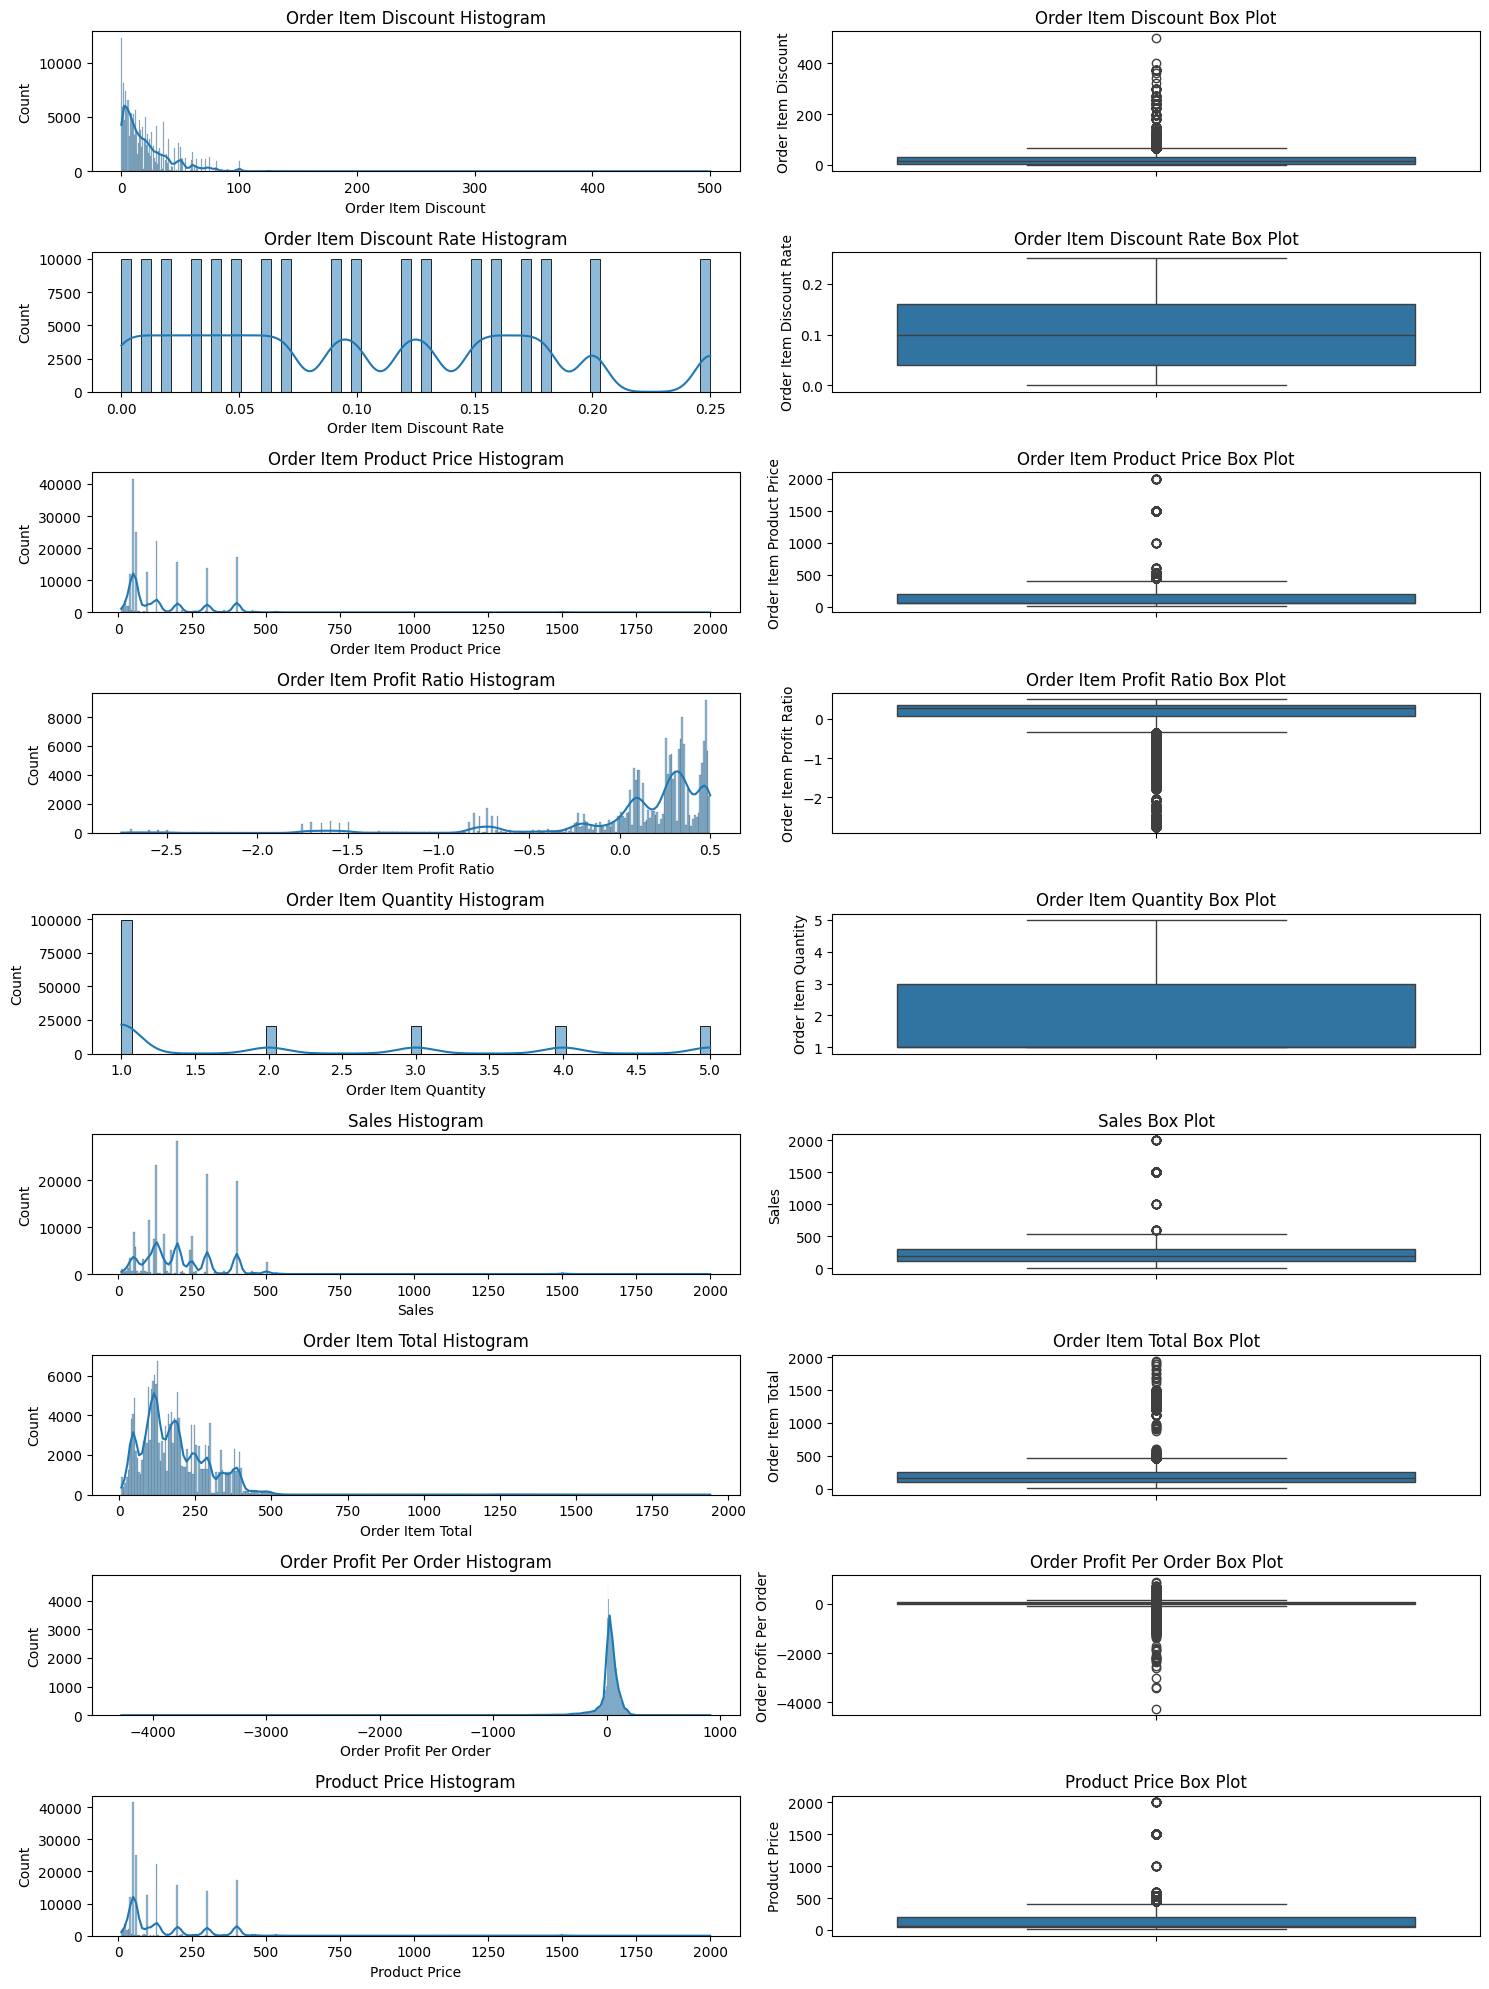

In [26]:
# Convert PySpark DataFrame to Pandas for plotting
df_pd = df.select(*num_col).toPandas()

# Define the number of rows and columns in the plot grid
row = min(9, len(num_col))  # Ensure row is not greater than the number of numeric columns
col = 2
count = 0  # Start count from 0

# Create subplots
fig, axs = plt.subplots(nrows=row, ncols=col, figsize=(15, 20))

# Loop through each numeric column
for i in num_col:
    if count >= row:  # Break loop if count exceeds row
        break

    # Plot histogram
    sns.histplot(data=df_pd[i], ax=axs[count, 0], kde=True)
    axs[count, 0].set_title(i + ' Histogram')

    # Plot box plot
    sns.boxplot(data=df_pd[i], ax=axs[count, 1], orient='v')
    axs[count, 1].set_title(i + ' Box Plot')

    count += 1

# Adjust subplot spacing
fig.subplots_adjust(hspace=0.4)

# Show the plot
plt.tight_layout()
plt.show()

All the Numerical Columns which we have in our Dataset is Fully Skewed either right or left . We are planning to do the statistical test to verify whether these columns are giving information about Predicting the target. After that we need to Remove the Outliers by IQR method, Capping or based on the Business understanding.

##Catogorical analaysis :
Target varibale : Late Delivery risk :

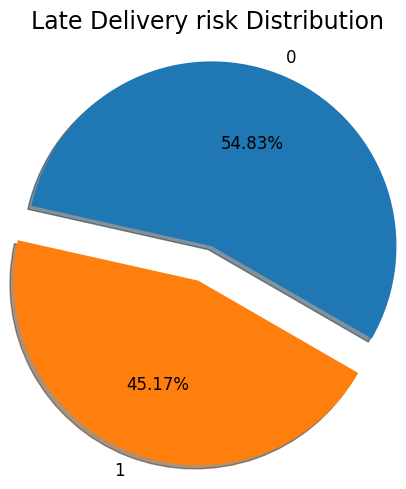

In [27]:
# Convert PySpark DataFrame to Pandas DataFrame
df_pd = df.toPandas()
# Plot pie chart
plt.figure(figsize=(5, 4))
plt.pie(df_pd['Late_delivery_risk'].value_counts(), labels=df_pd['Late_delivery_risk'].unique(),
        textprops={"fontsize": 12}, shadow=True, startangle=330, radius=1.5, autopct='%2.2f%%', explode=[0, 0.3])
plt.title('Late Delivery risk Distribution \n\n', fontdict={'fontsize': 17})
plt.show()


**class 1 (Late delivery risk)** - 54.83%

**class 0 (Late delivery risk)** - 45.17%

Our target variable is balance it ensures that the model is exposed to a similar number of examples from each class during training, and this can help prevent biases towards one class and improve the overall performance of the model.

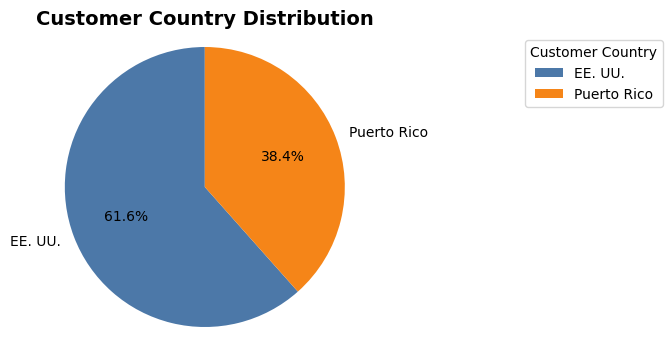

In [28]:
# Calculate value counts for 'Customer Country'
payment_counts = df_pd['Customer Country'].value_counts()

# Define colors for the pie chart
colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B', '#EECA3B']

# Plot pie chart
plt.figure(figsize=(5, 4))
plt.pie(payment_counts, labels=payment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Customer Country Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend(title='Customer Country', bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

EE.UU country with 61.6% of the customers may have a larger market share or a more favorable business environment that attracts more customers. Alternatively, it could be that the company has invested more resources in marketing or operations in that country, leading to a higher customer base. On the other hand, the Puerto Rico country with 38.4% of the customers may have a smaller market or less favorable business conditions, or the company may have less investment in that market.

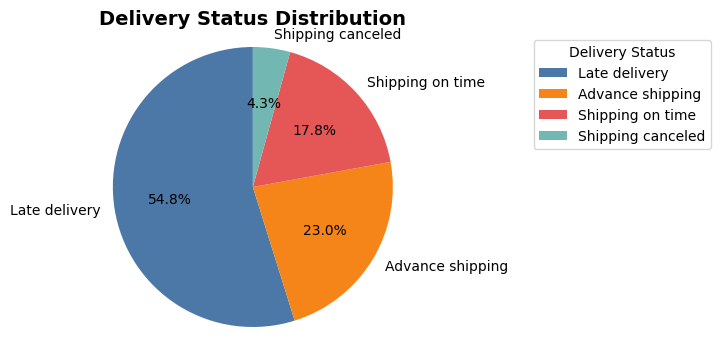

In [29]:
# Calculate value counts for 'Delivery Status'
delivery_counts = df_pd['Delivery Status'].value_counts()

# Define colors for the pie chart
colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B', '#EECA3B']

# Plot pie chart
plt.figure(figsize=(5, 4))
plt.pie(delivery_counts, labels=delivery_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Delivery Status Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend(title='Delivery Status', bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

*   54.8% orders were delivered late.
*   23% orders were shipped in advance.
*   17.8% orders were shipped on time
*   4.3% of shipping were canceled.





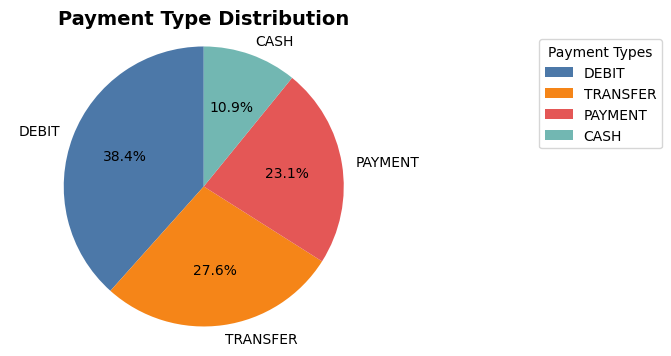

In [30]:
# Calculate value counts for 'Payment Type'
payment_counts = df_pd['Type'].value_counts()

# Define colors for the pie chart
colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B', '#EECA3B']

# Plot pie chart
plt.figure(figsize=(5, 4))
plt.pie(payment_counts, labels=payment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Payment Type Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend(title='Payment Types', bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

*   38.4% people used debit payment.
*   27.6% people used transfer sysytem.
*   23.1% people used payment system.
*   10.9% people used cash payment.






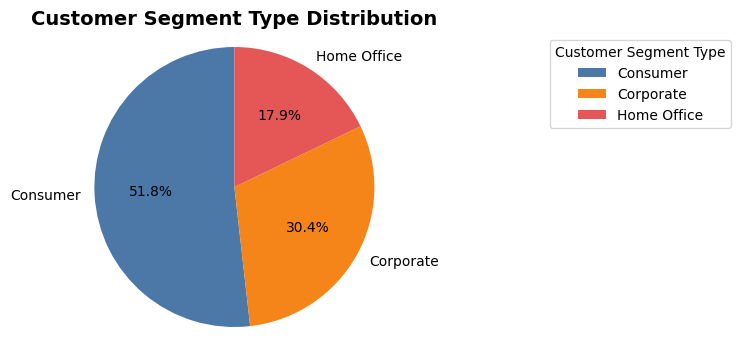

In [31]:
# Calculate value counts for 'Customer Segment Type'
segment_counts = df_pd['Customer Segment'].value_counts()

# Define colors for the pie chart
colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B', '#EECA3B']

# Plot pie chart
plt.figure(figsize=(5, 4))
plt.pie(segment_counts, labels=segment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segment Type Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend(title='Customer Segment Type', bbox_to_anchor=(1, 0, 0.8, 1))
plt.show()

*   51.8% of customers are consumers.
*   30.4% are corporates.
*   17.9% people are from home office category.






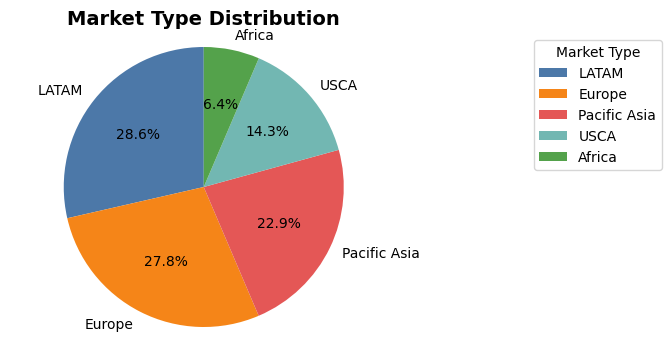

In [32]:
# Calculate value counts for 'Market Type'
market_counts = df_pd['Market'].value_counts()

# Define colors for the pie chart
colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B', '#EECA3B']

# Plot pie chart
plt.figure(figsize=(5, 4))
plt.pie(market_counts, labels=market_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Market Type Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.legend(title='Market Type', bbox_to_anchor=(1, 0, 0.7, 1))
plt.show()

*   Most of the order comming from LATAM which is 28.6%.
*   Order comming from EUROPE which is 27.8% .
*   Order comming from PACIFIC ASIA which is 22.9% .
*   Order coming from USCA which is 14.3%.
*   Less number of the order from AFRICA which is 6.4.







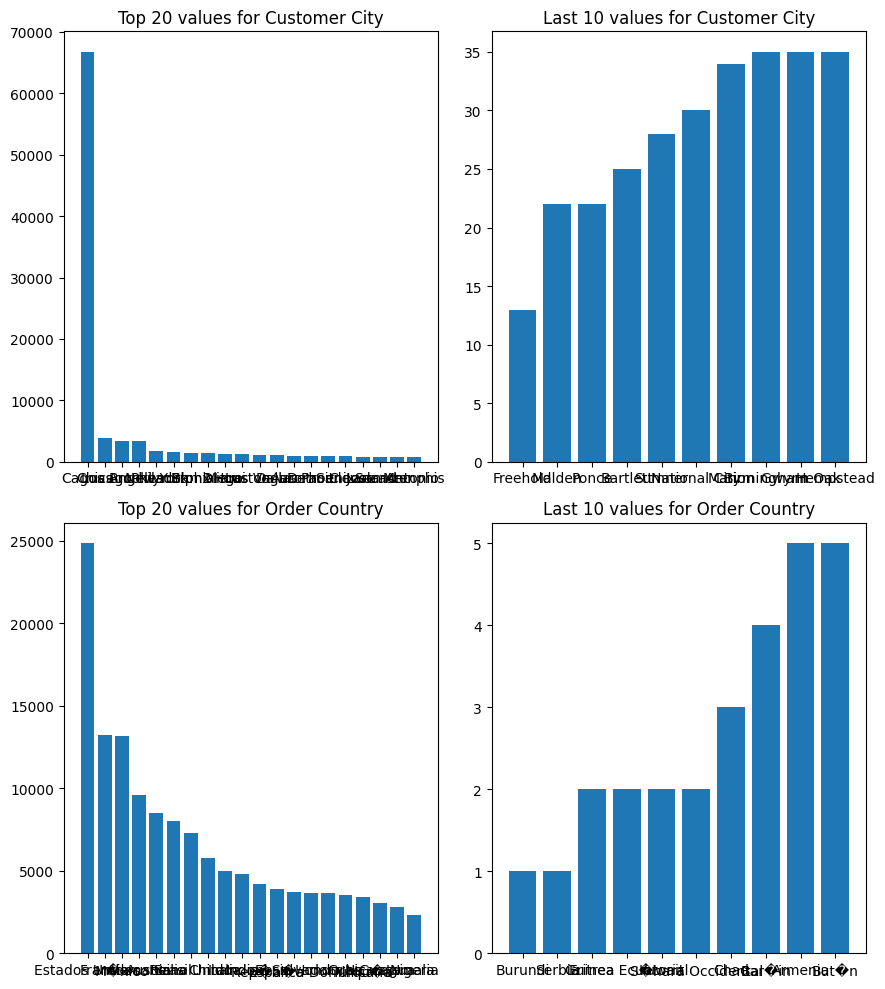

In [33]:
# List of categorical columns
cat_cols = ['Customer City', 'Order Country']

# Calculate value counts for each categorical column
value_counts = {col: df.groupBy(col).count().orderBy(col).collect() for col in cat_cols}

# Convert value counts to dictionaries
value_counts_dict = {col: {row[col]: row['count'] for row in value_counts[col]} for col in cat_cols}

# Sort the dictionaries by values
sorted_value_counts_top = {col: dict(sorted(value_counts_dict[col].items(), key=lambda item: item[1], reverse=True)[:20]) for col in cat_cols}
sorted_value_counts_last = {col: dict(sorted(value_counts_dict[col].items(), key=lambda item: item[1])[:10]) for col in cat_cols}

# Create subplots
fig, axs = plt.subplots(len(cat_cols), 2, figsize=(9, len(cat_cols) * 5))

# Plot top and last values for each categorical column
for i, col in enumerate(cat_cols):
    axs[i, 0].bar(sorted_value_counts_top[col].keys(), sorted_value_counts_top[col].values())
    axs[i, 0].set_title(f'Top 20 values for {col}')

    axs[i, 1].bar(sorted_value_counts_last[col].keys(), sorted_value_counts_last[col].values())
    axs[i, 1].set_title(f'Last 10 values for {col}')

# Adjust layout
plt.tight_layout()
plt.show()

Most of the customers are situated in Caguas City who ordered more and customers which situated in CA who are order less.

Most of the customers order from Estados Unidos and very less customers are order form Serbia and Burundi .

#ML

---


## Pandas Dataframe

In [34]:
df_pd = df.toPandas()

## SIMPLE RANDOM SAMPLING


####Simple random sampling is a type of probabilistic sampling in which the samples will be randomly select from population.
*   User define function for catogorical columns and numerical columns

In [65]:
def cat_num_cols(data):
    cat_cols = data.select_dtypes(include='object').columns
    num_cols = data.columns.drop(cat_cols)
    return cat_cols, num_cols

In [36]:
# def cat_num_cols(data):
#     # Get the schema of the DataFrame
#     schema = data.schema
#     # Extract column names and types
#     columns = [field.name for field in schema.fields]
#     types = [field.dataType for field in schema.fields]
#     # Determine categorical and numerical columns
#     cat_cols = [col for col, typ in zip(columns, types) if isinstance(typ, StringType)]
#     num_cols = [col for col, typ in zip(columns, types) if not isinstance(typ, StringType)]
#     return cat_cols, num_cols

*   So on population in numerical analysis we see that all the numerical variable are skewed i.e **data is not normal**
so we are not able to use paraetric test like t-test two independent sample test so we are using **MannWhitney-Utest** for checking is the population mean is equal to sample mean

**MannWhitney U-hypotheisis test :**
*   H0 : Population mean = Sample mean
*   H1 : Population mean != Sample mean

In [37]:
def mannwhitneyu_test(pop_series,sample_series):
    stat_val,p_value = stats.mannwhitneyu(pop_series,sample_series)
    if p_value > 0.05:
        return True
    else:
        return False

In [38]:
# from pyspark.sql import functions as F

# def mannwhitneyu_test(pop_series, sample_series):
#     # Calculate the quantiles for each series
#     pop_quantiles = pop_series.approxQuantile('value', [0.25, 0.5, 0.75], 0.001)
#     sample_quantiles = sample_series.approxQuantile('value', [0.25, 0.5, 0.75], 0.001)

#     # Calculate the Mann-Whitney U statistic
#     u_statistic = abs(pop_quantiles[1] - sample_quantiles[1])

#     # Calculate the critical value of U
#     n1 = pop_series.count()
#     n2 = sample_series.count()
#     critical_value = n1 * n2 / 2

#     # Determine if the test is significant
#     if u_statistic <= critical_value:
#         return True
#     else:
#         return False

for catorgorical feature we have to check the distribution of all types in each catogorical feature in sample and population will be same so for that we are using the Chi Square goodness of fit

## Chi square Goodness of Fit :
*   H0 : There is no significance difference between expected values(from population) and observed values (from sample)
*   H1 : There is significance difference between expected values(from population) and observed values (from sample)

In [39]:
def chi_square_goodness(pop_series,sample_series,alpha = 0.05):
    exp = pop_series.value_counts(normalize=True)*len(sample_series)
    obs = sample_series.value_counts()
    obs_fil = pd.Series(obs,index=exp.index).fillna(0)
    stat1,p_value = stats.chisquare(obs_fil,exp)
    if p_value>0.05:
        return True
    else:
        return False

In [40]:
# def chi_square_goodness(pop_series: DataFrame, sample_series: DataFrame, alpha=0.05):
#     # Calculate expected frequencies
#     #exp = pop_series.groupby('value').count().withColumnRenamed('count', 'expected')
#     exp = pop_series.groupby('value').agg(F.count('value').alias('expected'))
#     total_count = exp.select(F.sum('expected')).collect()[0][0]
#     exp = exp.withColumn('expected', exp['expected'] * len(sample_series) / total_count)
#     # Calculate observed frequencies
#    # obs = sample_series.groupBy('value').count().withColumnRenamed('count', 'observed')
#     obs = pop_series.groupBy(pop_series).count().withColumnRenamed('count', 'observed')
#     obs = obs.join(exp, on='value', how='right').na.fill(0)

#     # Calculate the chi-square statistic
#     chi_sq_statistic = obs.withColumn('chi_sq_term', F.pow((F.col('observed') - F.col('expected')), 2) / F.col('expected')) \
#         .agg(F.sum('chi_sq_term')).collect()[0][0]

#     # Calculate the p-value
#     dof = obs.count() - 1  # Degrees of freedom
#     p_value = 1 - F.chiSquareDist(chi_sq_statistic, dof).cumulativeProbability(alpha)

#     # Determine if the test is significant
#     if p_value > alpha:
#         return True
#     else:
#         return False

Using MannWhitney U-test and Chi Square goodness of fit we make user define function to check which size we have want for sample so that we can say that this given sample passes both the test for each columns and it is good representation of population.

In [41]:
def sampling_validation(data,start_sample_size,end_sample_size,incre):
    cat_col = cat_num_cols(data)[0]
    num_col = cat_num_cols(data)[1]
    d = {}
    for sample_size in np.arange(start_sample_size,end_sample_size,incre):
        num_cols = []
        for i in range(0,20):
            track_cols =[]
            valid_cols=0
            df_samp = data.sample(sample_size)
            for col in data.columns:
                if col in num_col:
                    if mannwhitneyu_test(data[col],df_samp[col]):
                        valid_cols+=1
                else:
                    if chi_square_goodness(data[col],df_samp[col]):
                        valid_cols+=1
            num_cols.append(valid_cols)
        d[sample_size] = np.mean(num_cols)
    return d

In [42]:
dic = sampling_validation(df_pd,5000,100000,5000)
dic

{5000: 34.65,
 10000: 35.05,
 15000: 35.65,
 20000: 35.65,
 25000: 35.5,
 30000: 35.4,
 35000: 35.6,
 40000: 35.65,
 45000: 35.85,
 50000: 35.6,
 55000: 35.95,
 60000: 36.0,
 65000: 35.85,
 70000: 36.0,
 75000: 36.0,
 80000: 36.0,
 85000: 35.95,
 90000: 36.0,
 95000: 36.0}

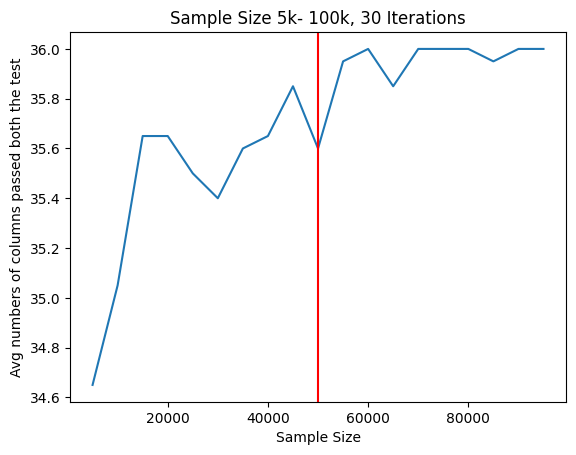

In [43]:
sns.lineplot(x=dic.keys(),y=dic.values())
plt.title('Sample Size 5k- 100k, 30 Iterations')
plt.xlabel('Sample Size')
plt.ylabel('Avg numbers of columns passed both the test')
plt.axvline(x = 50000,color='red')
plt.show()

In [66]:
def selecting_sample(data,sample_size):
    cat_col = cat_num_cols(data)[0]
    num_col = cat_num_cols(data)[1]
    cnt=0
    while True:
        cnt +=1
        valid_col =0
        df_samp = data.sample(sample_size)
        for col in data.columns:
            if col in num_col:
                if not mannwhitneyu_test(data[col],df_samp[col]):
                    break
            else:
                if not chi_square_goodness(data[col],df_samp[col]):
                    break
            valid_col +=1
        if valid_col == len(df_pd.columns):
            print(cnt)
            return df_samp

In [67]:
df_new_trial = selecting_sample(df_pd,50000)

1


In [68]:
final_sample="/content/drive/MyDrive/Colab Notebooks/Data/final_sample.csv"
df_sample = pd.read_csv(final_sample)

In [69]:
df_sample.drop('Unnamed: 0',axis=1,inplace=True)

In [70]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           50000 non-null  object 
 1   Days for shipping (real)       50000 non-null  int64  
 2   Days for shipment (scheduled)  50000 non-null  int64  
 3   Delivery Status                50000 non-null  object 
 4   Late_delivery_risk             50000 non-null  int64  
 5   Customer City                  50000 non-null  object 
 6   Customer Country               50000 non-null  object 
 7   Customer Id                    50000 non-null  int64  
 8   Customer Segment               50000 non-null  object 
 9   Customer State                 50000 non-null  object 
 10  Customer Zipcode               50000 non-null  float64
 11  Department Id                  50000 non-null  int64  
 12  Latitude                       50000 non-null 

In [71]:
df_sample["Late_delivery_risk"]= pd.Series(df_sample["Late_delivery_risk"],dtype=object)
df_sample["Product Category Id"]= pd.Series(df_sample["Product Category Id"],dtype=object)
df_sample["Customer Id"]= pd.Series(df_sample["Customer Id"],dtype=object)
df_sample["Department Id"]= pd.Series(df_sample["Department Id"],dtype=object)
df_sample["Order Item Cardprod Id"]= pd.Series(df_sample["Order Item Cardprod Id"],dtype=object)
df_sample["Customer Zipcode"]= pd.Series(df_sample["Customer Zipcode"],dtype=object)

In [72]:
df_sample.describe()

,Days for shipping (real),Days for shipment (scheduled),Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.498140,2.927680,29.726470,-84.856839,20.564199,0.101212,141.219129,0.120579,2.129040,203.550493,182.986542,21.940939,141.219129
std,1.630144,1.379075,9.821217,21.479170,21.663170,0.070202,140.672939,0.465650,1.452994,133.058238,120.821810,105.802651,140.672939
min,0.000000,0.000000,-33.937553,-158.025986,0.000000,0.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,9.990000
25%,2.000000,2.000000,18.266146,-98.274086,5.400000,0.040000,50.000000,0.080000,1.000000,119.980003,104.379997,7.040000,50.000000
50%,3.000000,4.000000,33.144863,-76.766708,14.000000,0.090000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59.990002
75%,5.000000,4.000000,39.288494,-66.370583,29.990000,0.160000,199.990005,0.360000,3.000000,299.950012,245.979996,64.769997,199.990005
max,6.000000,4.000000,48.781933,115.263077,375.000000,0.250000,1999.989990,0.500000,5.000000,1999.989990,1899.989990,720.000000,1999.989990


In [73]:
df_pd.describe()

,Days for shipping (real),Days for shipment (scheduled),Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Product Status
count,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.000000,180516.0
mean,3.497657,2.931845,29.719830,-84.915074,20.664413,0.101667,141.231298,0.120644,2.127656,203.771883,183.107723,21.974593,141.231298,0.0
std,1.623731,1.374449,9.813676,21.432911,21.800633,0.070415,139.732278,0.466799,1.453456,132.273070,120.043872,104.434300,139.732278,0.0
min,0.000000,0.000000,-33.937553,-158.025986,0.000000,0.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,9.990000,0.0
25%,2.000000,2.000000,18.265432,-98.446312,5.400000,0.040000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,50.000000,0.0
50%,3.000000,4.000000,33.144863,-76.840759,14.000000,0.100000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59.990002,0.0
75%,5.000000,4.000000,39.279617,-66.370583,29.990000,0.160000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,199.990005,0.0
max,6.000000,4.000000,48.781933,115.263077,500.000000,0.250000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1999.989990,0.0


In [74]:
df_long_lat = df_sample[['Latitude','Longitude']]

##Analysis on sample
###Bivariate Analysis
Catogorical vs Catogorical :

In [75]:
df_sample.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Category Id', 'Product Name', 'Product Price',
       'Shipping Mode'],
      dtype='object')

####City Analysis

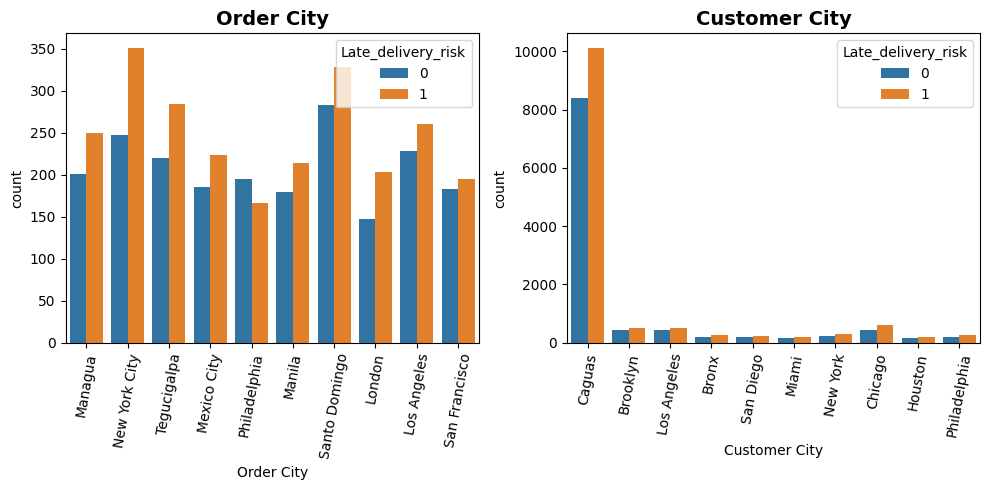

In [76]:
  plt.figure(figsize=(10, 5))
for i, col in enumerate(['Order City', 'Customer City'], 1):
    plt.subplot(1, 2, i)
    top_cats_name = df_sample[col].value_counts().head(10).index
    df_top_cats_name = df_sample[df_sample[col].isin(top_cats_name)]
    sns.countplot(data=df_top_cats_name, x=col, hue='Late_delivery_risk')
    plt.title(col, fontsize=14, fontweight='bold')
    plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


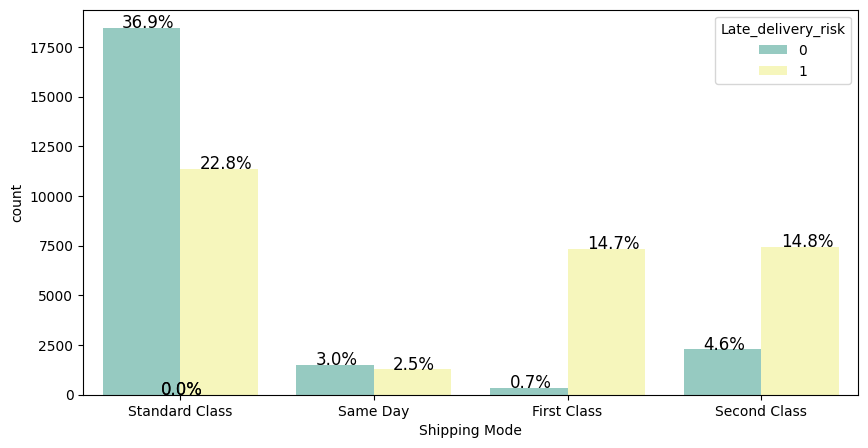

In [77]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Shipping Mode', hue='Late_delivery_risk', data=df_sample, palette='Set3')
total = len(df_sample['Shipping Mode'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.1
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y), size=12)

plt.show()

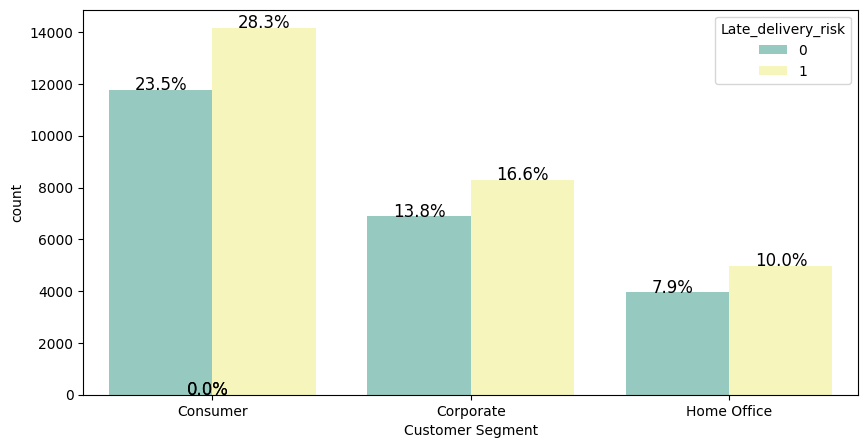

In [78]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Customer Segment', hue='Late_delivery_risk', data=df_sample, palette='Set3')
total = len(df_sample['Customer Segment'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.1
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y), size=12)

plt.show()


*   28.3% late delivery to Consumer and 23.5% are not late delivery to Consumer

*   16.6% late delivery to Corporate Customer Segment and 13.8% are not late delivery to Corporate Customer Segment
*   10.0% late delivery to Home Office and 7.9 are not late delivery to Home Office

##Market Analysis

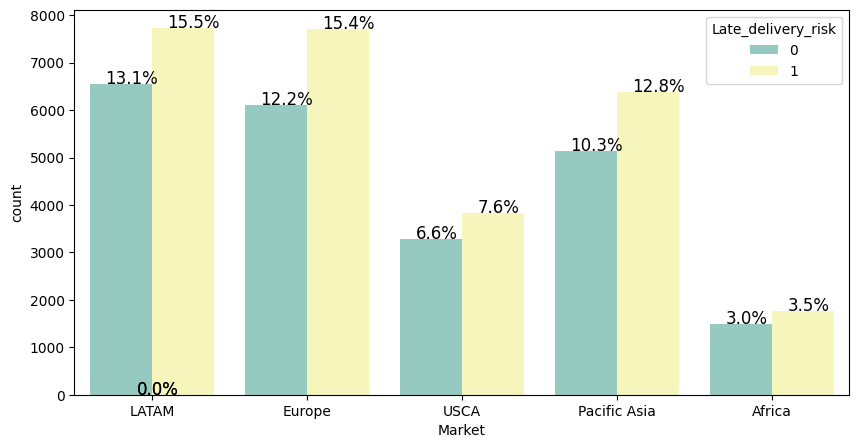

In [79]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Market', hue='Late_delivery_risk', data=df_sample, palette='Set3')
total = len(df_sample['Market'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.1
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y), size=12)

plt.show()

* Same number of percentage (approx 15.5%) of late delivery from EUROPE and LATAM
*   Less number of percentage 3.5% of late delivery from Africa because anyhow less number of delivery are comming from Africa.

##Customer Country Analysis :

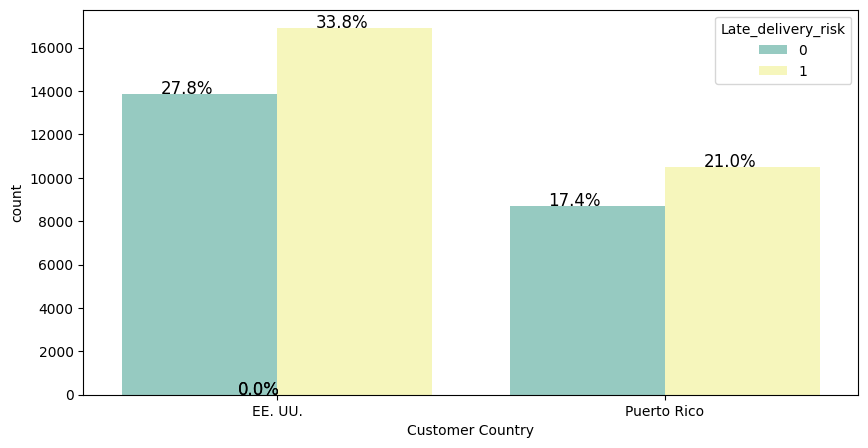

In [80]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Customer Country', hue='Late_delivery_risk', data=df_sample, palette='Set3')
total = len(df_sample['Customer Country'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.1
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y), size=12)

plt.show()

*   33.8% late delivery going to EE.UU country and 27.8% are not late delivery.
*   21.0% late delivery going to Puerto Rico and 17.4% are not late delivery.

##Statistical Hypothesis test with target variable
###Chi2 Contingency test :
H0 : X and Y(Late delivery risk) are independent.

H1 : X and Y (Late delivery risk) are dependent.

Using above test we compare the catogorical feature vs target variable and above test giving that which feature is dependent on target variable.

In [84]:
def cat_num_cols(data):
    cat_cols = cat_cols = data.select_dtypes(object).columns
    num_cols = data.columns.drop(cat_cols)
    return cat_cols,num_cols

In [85]:
def cols_failing_chi2_contigency(data):
    failed_cat_cols = []
    for col in cat_num_cols(data)[0]:
        target = pd.crosstab(data[col],data["Late_delivery_risk"]).values
        if stats.chi2_contingency(target)[1]<=0.05:
            print(col,"---Dependency with target: ",stats.chi2_contingency(target)[1])
        elif stats.chi2_contingency(target)[1]>0.05:
            print(col,"---Independency with target: ",stats.chi2_contingency(target)[1])
            failed_cat_cols.append(col)
    return failed_cat_cols

In [86]:
cols_failing_chi2_contigency(df_sample)

Type ---Dependency with target:  3.983218645453983e-63
Delivery Status ---Dependency with target:  0.0
Late_delivery_risk ---Dependency with target:  0.0
Customer City ---Dependency with target:  1.2924070674132346e-17
Customer Country ---Independency with target:  0.6471214715360867
Customer Id ---Dependency with target:  8.458022480688344e-266
Customer Segment ---Independency with target:  0.14820863801169445
Customer State ---Independency with target:  0.14553370113586203
Customer Zipcode ---Dependency with target:  1.3546076974687284e-30
Department Id ---Independency with target:  0.6173245973490966
Market ---Dependency with target:  0.009368953749959769
Order City ---Dependency with target:  4.3082119343917024e-122
Order Country ---Dependency with target:  4.6779481274142924e-07
Order Item Cardprod Id ---Independency with target:  0.5789665482034425
Order Region ---Dependency with target:  0.004274655797848006
Order State ---Dependency with target:  9.076168501313578e-49
Order Sta

['Customer Country',
 'Customer Segment',
 'Customer State',
 'Department Id',
 'Order Item Cardprod Id',
 'Product Category Id',
 'Product Name']

There are six features 'Customer Country', 'Customer State', 'Product Name','Department Id','Order ItemCardprod Id','Product Category Id','Product Name' are Independent with Late delivery risk so we drop that from dataset.

In [87]:
df_sample.drop(['Customer Country','Customer State','Department Id','Order Item Cardprod Id','Product Category Id','Product Name'],axis=1,inplace=True)

In [88]:
df_sample.shape

(50000, 27)

In [89]:
df_sample.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Customer City', 'Customer Id',
       'Customer Segment', 'Customer Zipcode', 'Latitude', 'Longitude',
       'Market', 'Order City', 'Order Country', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Price', 'Shipping Mode'],
      dtype='object')

##Catogorical vs Numerical :

In [90]:
cols = list(df_sample.select_dtypes(np.number).drop(['Latitude','Longitude'],axis=1).columns)
cols

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Price']

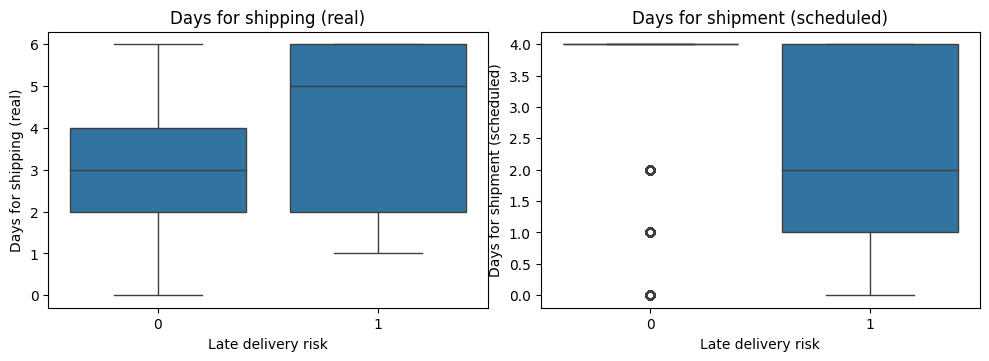

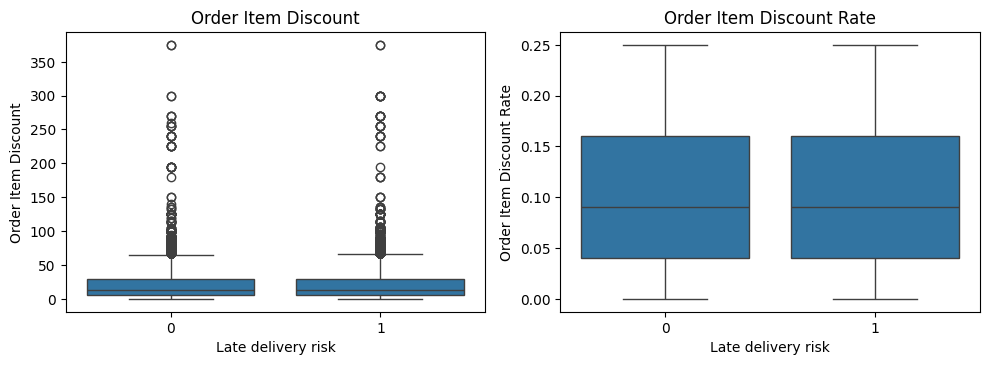

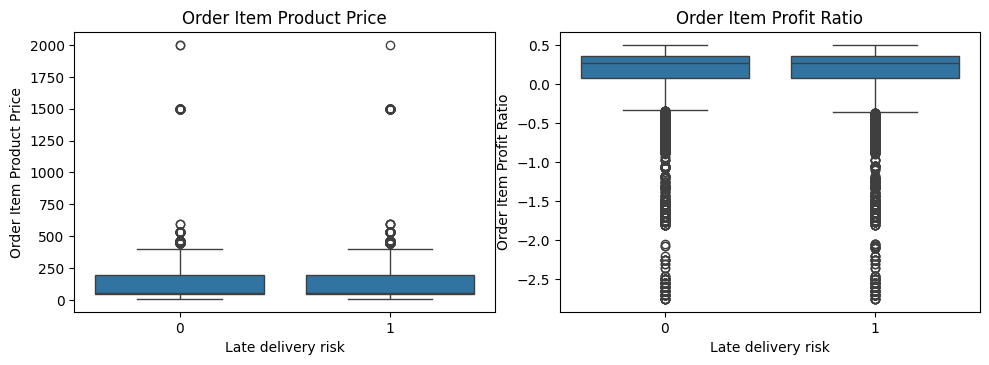

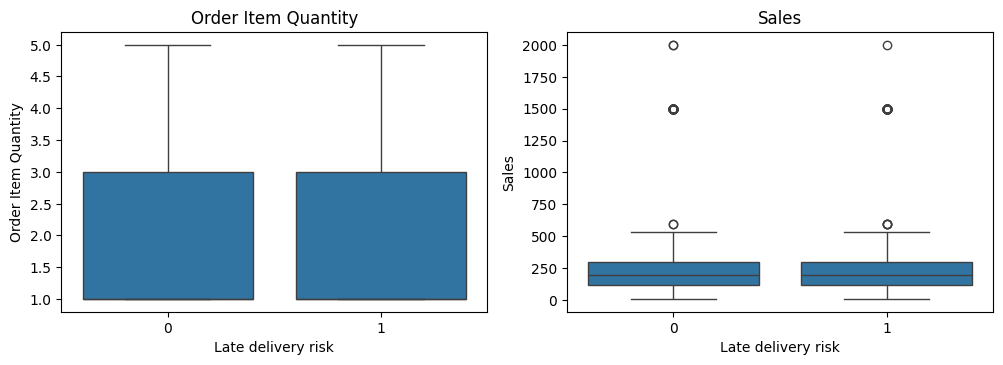

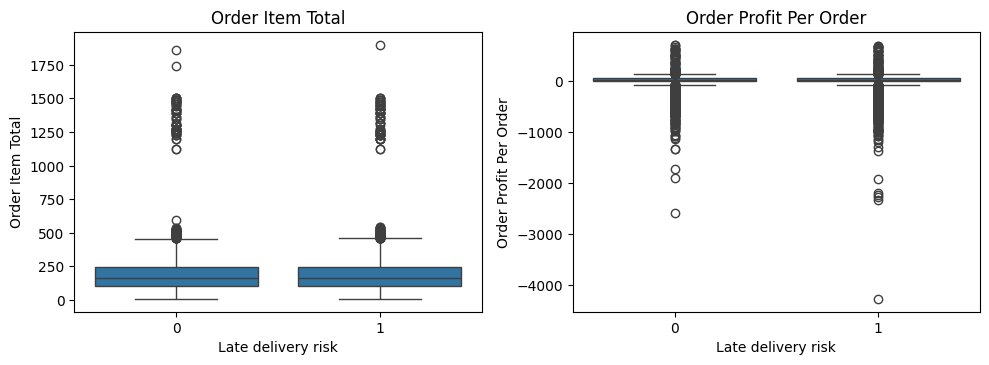

In [91]:
num_rows = 6
num_cols = 2
cols
subplot_index = 1
for i in range(0, len(cols)-1, 2):
    plt.figure(figsize=(10, 20))
    plt.subplot(num_rows, num_cols, subplot_index)
    sns.boxplot(x="Late_delivery_risk", y=cols[i], data=df_sample)
    plt.xlabel("Late delivery risk")
    plt.ylabel(cols[i])
    plt.title(cols[i])
    subplot_index += 1

    # Add the second subplot
    plt.subplot(num_rows, num_cols, subplot_index)
    sns.boxplot(x="Late_delivery_risk", y=cols[i+1], data=df_sample)
    plt.xlabel("Late delivery risk")
    plt.ylabel(cols[i+1])
    plt.title(cols[i+1])
    subplot_index += 1

    # Show the figure
    plt.tight_layout()
    plt.show()

##Statistical Hypothesis test with target variable:
###MannWhitney U-hypotheisis test :
H0 : numerical mean[0] = numerical mean [1]

H1 : numerical mean[0] != Snumerical mean [1]

H0 : There is no relation between late delivery risk and numerical col

H1 : There is relation between late delivery risk and numerical col

In [92]:
def cols_failing_mannwhitneyu(data):
    failed_cat_cols = []
    for col in cat_num_cols(data)[1]:
        df_0= data[data["Late_delivery_risk"]==0][col]
        df_1= data[data["Late_delivery_risk"]==1][col]
        print(col,"---mannwhitneyu",stats.mannwhitneyu(df_0,df_1)[1])
        if stats.mannwhitneyu(df_0,df_1)[1]>=0.05:
            failed_cat_cols.append(col)
    return failed_cat_cols

In [93]:
df_sample.drop(cols_failing_mannwhitneyu(df_sample),axis=1,inplace=True)

Days for shipping (real) ---mannwhitneyu 0.0
Days for shipment (scheduled) ---mannwhitneyu 0.0
Latitude ---mannwhitneyu 0.44290962733866424
Longitude ---mannwhitneyu 0.9560681618360636
Order Item Discount ---mannwhitneyu 0.9016297635848012
Order Item Discount Rate ---mannwhitneyu 0.7910943507017261
Order Item Product Price ---mannwhitneyu 0.7540956408218071
Order Item Profit Ratio ---mannwhitneyu 0.9149521244603029
Order Item Quantity ---mannwhitneyu 0.6503558421625346
Sales ---mannwhitneyu 0.680970975269799
Order Item Total ---mannwhitneyu 0.6878973896567004
Order Profit Per Order ---mannwhitneyu 0.7337778411761569
Product Price ---mannwhitneyu 0.7540956408218071


By using the MannWhitney U-hypotheisis test we check the mean of numerical features of late deilvery risk and mean numerical features of no late delivery risk and if both are equal then we its says that there is no relation between late deliverly risk and given numerical feature

In [94]:
df_sample.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Customer City,Customer Id,Customer Segment,Customer Zipcode,Market,Order City,Order Country,Order Region,Order State,Order Status,Shipping Mode
0,DEBIT,5,4,Late delivery,1,Taylor,17,Consumer,48180.0,LATAM,Sorocaba,Brasil,South America,São Paulo,COMPLETE,Standard Class
1,TRANSFER,6,4,Late delivery,1,Caguas,8889,Consumer,725.0,Europe,Leicester,Reino Unido,Northern Europe,Inglaterra,PROCESSING,Standard Class
2,CASH,4,4,Shipping on time,0,Lynwood,10701,Consumer,90262.0,USCA,San Luis Obispo,Estados Unidos,West of USA,California,CLOSED,Standard Class


In [95]:
df_sample.shape

(50000, 16)

In [96]:
df_sample.drop(["Days for shipping (real)","Days for shipment (scheduled)","Delivery Status"],axis=1,inplace=True)

These are the features which are directly giving the information about target which are getting from the feature engineering so we are drop that features.

In [97]:
df_sample.to_csv('df_last.csv',index=False)

Different types of models for Different Encoding:


In [98]:
from scipy import stats
import statsmodels.api as sm
import statistics
from statsmodels.stats import weightstats
#from statsmodels.formula.api import ols
#from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
# function to perform post-hoc test


# import function to perform post-hoc
import scikit_posthocs
from scipy import stats
from statsmodels.stats import weightstats
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score

In [99]:
df_sample = pd.read_csv("df_last.csv")

In [100]:
df_sample.shape

(50000, 13)

In [101]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                50000 non-null  object 
 1   Late_delivery_risk  50000 non-null  int64  
 2   Customer City       50000 non-null  object 
 3   Customer Id         50000 non-null  int64  
 4   Customer Segment    50000 non-null  object 
 5   Customer Zipcode    50000 non-null  float64
 6   Market              50000 non-null  object 
 7   Order City          50000 non-null  object 
 8   Order Country       50000 non-null  object 
 9   Order Region        50000 non-null  object 
 10  Order State         50000 non-null  object 
 11  Order Status        50000 non-null  object 
 12  Shipping Mode       50000 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 5.0+ MB


##MODELS 1 :


Encoding :

Target encoding (probability encoding all except type and shipping mode
Dummy Encoidng on Type, Shipping mode

In [102]:
df_model_1 = df_sample.copy()

In [103]:
#Target Encode
def Target_encode_test(data,cols):
    d_map = {}
    for col in cols:
        cross = pd.crosstab(data[col],data["Late_delivery_risk"])
        cross["prob"] = cross[1]/(cross[1]+cross[0])
        d = {}
        for cat in cross.index:
            d[cat] = cross.loc[cat,"prob"]
        d_map[col] = d
    return d_map

In [104]:
def map_categories_encode(data,dic):
    for col in dic.keys():
        data[col]= data[col].map(dic[col])

In [105]:
en_cols = df_model_1.columns.drop(["Late_delivery_risk","Type","Shipping Mode"])
Tar_encode_dict = Target_encode_test(df_model_1,en_cols)
map_categories_encode(df_model_1,Tar_encode_dict)

In [106]:
df_model_1.head(4)

,Type,Late_delivery_risk,Customer City,Customer Id,Customer Segment,Customer Zipcode,Market,Order City,Order Country,Order Region,Order State,Order Status,Shipping Mode
0,DEBIT,1,0.588235,0.428571,0.546311,0.588235,0.541360,0.666667,0.532937,0.534044,0.553704,0.571845,Standard Class
1,TRANSFER,1,0.546353,0.571429,0.546311,0.546353,0.557981,0.700000,0.534328,0.544673,0.538627,0.575902,Standard Class
2,CASH,0,0.518519,0.400000,0.546311,0.518519,0.537456,0.000000,0.540035,0.523765,0.526045,0.571559,Standard Class
3,CASH,1,0.546353,1.000000,0.546311,0.546353,0.553627,0.535714,0.574468,0.564974,0.535714,0.571559,Same Day


In [107]:
df_final = pd.get_dummies(df_model_1,drop_first=True)

##train_test_split


In [108]:
x = df_final.drop("Late_delivery_risk",axis=1)
y = df_final["Late_delivery_risk"]

In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=34)
print(f"x_train {x_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

x_train (40000, 16)
x_test (10000, 16)
y_train (40000,)
y_test (10000,)


##BASE MODEL
From Bussinees point of view we need to get a good recall score because when we prdict its an late delivery risk and its not then not a problem but when we say its not a late delivery risk and its actually a late delivery then its a problem.
So, we try to focus mainly on recall score and not on accuracy

Naive Bayes


Test Recall: 0.9556695365451547
Train Recall: 0.9528495284952849


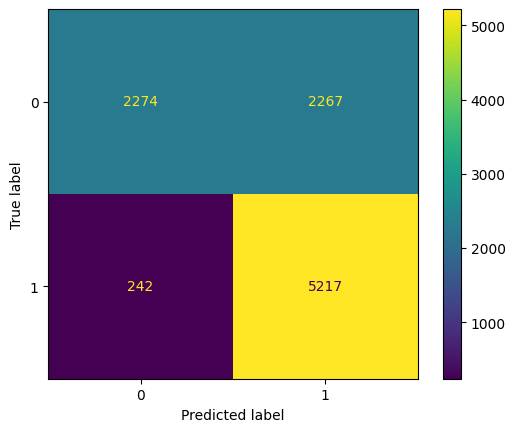

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Assume we have our input features in a variable called X and our labels in a variable called y
# Split the data into training and testing sets
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

nb_classifier.fit(x_train,y_train)
y_pred_test = nb_classifier.predict(x_test)
y_pred_train = nb_classifier.predict(x_train)
nb_classifier.score(x_test,y_test)
print("Test Recall:", recall_score(y_test,y_pred_test))
print("Train Recall:", recall_score(y_train,y_pred_train))

#cm = confusion_matrix(y_test,y_pred_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)
plt.show()

In [111]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.50      0.64      4541
           1       0.70      0.96      0.81      5459

    accuracy                           0.75     10000
   macro avg       0.80      0.73      0.73     10000
weighted avg       0.79      0.75      0.73     10000



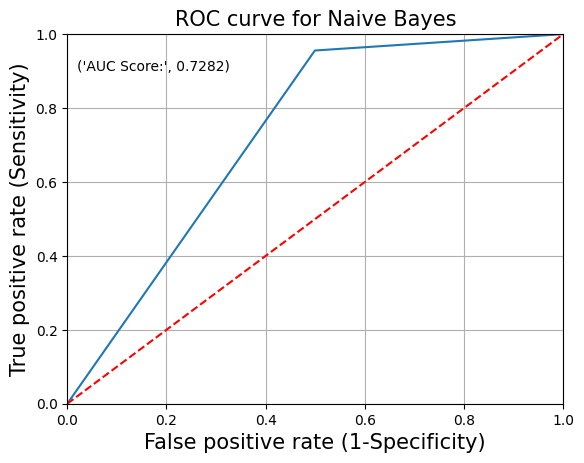

In [112]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr)
# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Naive Bayes', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_test),4)))

# plot the grid
plt.grid(True)

##Logistic

In [113]:
lg = sm.Logit(y_train,x_train).fit()
lg.summary()

Optimization terminated successfully.
         Current function value: 0.305381
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Late_delivery_risk   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39984
Method:                           MLE   Df Model:                           15
Date:                Tue, 20 Feb 2024   Pseudo R-squ.:                  0.5564
Time:                        17:39:13   Log-Likelihood:                -12215.
converged:                       True   LL-Null:                       -27535.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Customer City                   -0.1189      0.372     -0.319      0.750      -0.849       0.611
Customer Id                      6.2515      0.076     82.140      0.000       6.102       6.401
Customer Segment               -10.4364      1.873     -5.573      0.000     -14.107      -6.766
Customer Zipcode                -0.2337      0.287     -0.815      0.415      -0.796       0.328
Market                          -4.0320      2.169     -1.859      0.063      -8.282       0.218
Order City                       4.9340      0.148     33.314      0.000       4.644       5.224
Order Country                   -1.0293      0.553     -1.860      0.063      -2.114       0.055
Order Region                    -2.2896      1.369     -1.673      0.094      -4.972       0.393
Order State                      0.0135      0.253      0.053      0.957      -0.482       0.509
Order Status                    19.9702      1.253     15.938      0.000      17.514      22.426
Type_DEBIT                       0.0849      0.054      1.570      0.116      -0.021       0.191
Type_PAYMENT                    -0.0933      0.058     -1.611      0.107      -0.207       0.020
Type_TRANSFER                   -0.1121      0.058     -1.931      0.053      -0.226       0.002
Shipping Mode_Same Day          -7.6394      0.585    -13.062      0.000      -8.786      -6.493
Shipping Mode_Second Class      -6.1236      0.582    -10.513      0.000      -7.265      -4.982
Shipping Mode_Standard Class    -7.8997      0.582    -13.574      0.000      -9.040      -6.759
================================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Train recall 0.8640608628308505
Test recall 0.8629785675032057


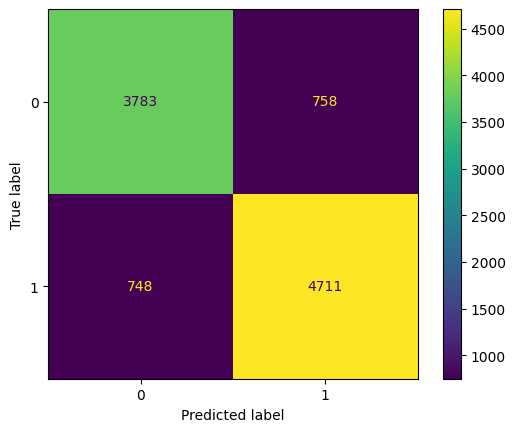

In [114]:
print(f"Train recall {recall_score(y_train,lg.predict(x_train).map(lambda x: 1 if x>0.5 else 0))}")
print(f"Test recall {recall_score(y_test,lg.predict(x_test).map(lambda x: 1 if x>0.5 else 0))}")
ConfusionMatrixDisplay.from_predictions(y_test,lg.predict(x_test).map(lambda x: 1 if x>0.5 else 0))
plt.show()

##SUMMARY FOR ABOVE ALL MODELS FOR FIRST ENCODING :


In [115]:
clfs = {
      'RandomForest':RandomForestClassifier(),
      'AdaBoost': AdaBoostClassifier(),
      'GradientBoost': GradientBoostingClassifier(),
      'XGBoost': XGBClassifier(),
        'BaggingRF': BaggingClassifier(base_estimator=RandomForestClassifier()),
       'BaggingAda': BaggingClassifier(base_estimator=AdaBoostClassifier()),
       'BaggingGB': BaggingClassifier(base_estimator=GradientBoostingClassifier()),
       'BaggingXGB': BaggingClassifier(base_estimator=XGBClassifier()),
        'GaussianNB': GaussianNB()}

model_report = pd.DataFrame(columns = ["Model","Train_Accuracy_score","Test_Accuracy_score","Train_Recall_score","Test_Recall_score"])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train,y_train)
    y_pred_prob_test = clf.predict(x_test)
    y_pred_test = [1 if i > 0.5 else 0 for i in y_pred_prob_test]
    y_pred_prob_train = clf.predict(x_train)
    y_pred_train = [1 if i > 0.5 else 0 for i in y_pred_prob_train]

    print('Fitting the model .......', clf_name)
    t= pd.Series({
        'Model': clf_name,
      'Train_Accuracy_score':accuracy_score(y_train,y_pred_train),
        'Test_Accuracy_score':accuracy_score(y_test,y_pred_test),
        'Train_Recall_score':recall_score(y_train,y_pred_train),
        'Test_Recall_score':recall_score(y_test,y_pred_test)

    })
    model_report = model_report.append(t,ignore_index=True)
#Focusing mainly on recall score so we sort by recall score to get our best model
model_report = model_report.sort_values(by='Test_Recall_score', ascending=False)
model_report

Fitting the model ....... RandomForest


<ipython-input-115-b522f6573de0>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)


Fitting the model ....... AdaBoost


<ipython-input-115-b522f6573de0>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)


Fitting the model ....... GradientBoost


<ipython-input-115-b522f6573de0>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)


Fitting the model ....... XGBoost


<ipython-input-115-b522f6573de0>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fitting the model ....... BaggingRF


<ipython-input-115-b522f6573de0>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fitting the model ....... BaggingAda


<ipython-input-115-b522f6573de0>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fitting the model ....... BaggingGB


<ipython-input-115-b522f6573de0>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fitting the model ....... BaggingXGB


<ipython-input-115-b522f6573de0>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)


Fitting the model ....... GaussianNB


<ipython-input-115-b522f6573de0>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)


,Model,Train_Accuracy_score,Test_Accuracy_score,Train_Recall_score,Test_Recall_score
8,GaussianNB,0.750475,0.7491,0.952850,0.955670
0,RandomForest,0.998300,0.8988,0.998178,0.907675
4,BaggingRF,0.980150,0.8935,0.979318,0.902729
3,XGBoost,0.905450,0.8624,0.902282,0.867375
7,BaggingXGB,0.902150,0.8631,0.898319,0.866459
1,AdaBoost,0.851800,0.8503,0.861510,0.863162
5,BaggingAda,0.855850,0.8517,0.862466,0.862979
6,BaggingGB,0.860150,0.8538,0.862831,0.859498
2,GradientBoost,0.859500,0.8535,0.861328,0.858399


##MODELS 2 :

###encoding
dropping Market,Order Country,Order region,Order state

Target encoding (probability encoding all except type and shipping mode

Dummy Encoidng on Type, Shipping mode

In [116]:
df_model_2 = df_sample.copy()

In [117]:
df_model_2.drop(["Customer Segment","Order Country","Order State"],axis=1,inplace=True)

In [118]:
en_cols = df_model_2.columns.drop(["Late_delivery_risk","Order Status","Shipping Mode","Type","Market"])
Tar_encode_dict = Target_encode_test(df_model_2,en_cols)
map_categories_encode(df_model_2,Tar_encode_dict)
df_final = pd.get_dummies(df_model_2,drop_first=True)
x = df_final.drop("Late_delivery_risk",axis=1)
y = df_final["Late_delivery_risk"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=34)
print(f"x_train {x_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

x_train (40000, 23)
x_test (10000, 23)
y_train (40000,)
y_test (10000,)


In [119]:
df_final.head(3)

,Late_delivery_risk,Customer City,Customer Id,Customer Zipcode,Order City,Order Region,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Market_Europe,...,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,1,0.588235,0.428571,0.588235,0.666667,0.534044,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0.546353,0.571429,0.546353,0.700000,0.544673,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0.518519,0.400000,0.518519,0.000000,0.523765,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##SUMMARY FOR ABOVE ALL MODELS FOR SECOND ENCODING :


In [120]:
# checking for all vanila model
clfs = {
      'RandomForest':RandomForestClassifier(),
      'AdaBoost': AdaBoostClassifier(),
      'GradientBoost': GradientBoostingClassifier(),
      'XGBoost': XGBClassifier(),
        'BaggingRF': BaggingClassifier(base_estimator=RandomForestClassifier()),
       'BaggingAda': BaggingClassifier(base_estimator=AdaBoostClassifier()),
       'BaggingGB': BaggingClassifier(base_estimator=GradientBoostingClassifier()),
       'BaggingXGB': BaggingClassifier(base_estimator=XGBClassifier()),
        'GaussianNB': GaussianNB()}

model_report = pd.DataFrame(columns = ["Model","Train_Accuracy_score","Test_Accuracy_score","Train_Recall_score","Test_Recall_score"])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train,y_train)
    y_pred_prob_test = clf.predict(x_test)
    y_pred_test = [1 if i > 0.5 else 0 for i in y_pred_prob_test]
    y_pred_prob_train = clf.predict(x_train)
    y_pred_train = [1 if i > 0.5 else 0 for i in y_pred_prob_train]

    print('Fitting the model .......', clf_name)
    t= pd.Series({
        'Model': clf_name,
      'Train_Accuracy_score':accuracy_score(y_train,y_pred_train),
        'Test_Accuracy_score':accuracy_score(y_test,y_pred_test),
        'Train_Recall_score':recall_score(y_train,y_pred_train),
        'Test_Recall_score':recall_score(y_test,y_pred_test)

    })
    model_report = model_report.append(t,ignore_index=True)
#Focusing mainly on recall score so we sort by recall score to get our best model
model_report = model_report.sort_values(by='Test_Recall_score', ascending=False)
model_report

Fitting the model ....... RandomForest


<ipython-input-120-5d3ab01005d0>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)


Fitting the model ....... AdaBoost


<ipython-input-120-5d3ab01005d0>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)


Fitting the model ....... GradientBoost


<ipython-input-120-5d3ab01005d0>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)


Fitting the model ....... XGBoost


<ipython-input-120-5d3ab01005d0>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fitting the model ....... BaggingRF


<ipython-input-120-5d3ab01005d0>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fitting the model ....... BaggingAda


<ipython-input-120-5d3ab01005d0>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fitting the model ....... BaggingGB


<ipython-input-120-5d3ab01005d0>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fitting the model ....... BaggingXGB


<ipython-input-120-5d3ab01005d0>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
<ipython-input-120-5d3ab01005d0>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)


Fitting the model ....... GaussianNB


,Model,Train_Accuracy_score,Test_Accuracy_score,Train_Recall_score,Test_Recall_score
8,GaussianNB,0.571425,0.5674,1.000000,1.000000
0,RandomForest,0.995550,0.8926,0.995536,0.901447
4,BaggingRF,0.975600,0.8872,0.976311,0.898150
1,AdaBoost,0.849800,0.8443,0.870256,0.868657
7,BaggingXGB,0.896900,0.8615,0.893991,0.867925
3,XGBoost,0.897975,0.8585,0.895859,0.864627
5,BaggingAda,0.849450,0.8459,0.863195,0.864627
2,GradientBoost,0.857775,0.8505,0.861783,0.858033
6,BaggingGB,0.857225,0.8519,0.859596,0.857300


Gaussian NB is high in recall score but over all accuracy is very low so on model 2 we select as XG boost becuase its generelised model. So XG boost is consistent for most of the encoding.

##MODELS - 3 :


In [121]:
df_model_3 = df_sample.copy()

###encoding
*   dropping Customer Segment,Order Country,Order State,Market,Order Region
*   Target encoding (probability encoding all except type and shipping mode
*   Dummy Encoidng on Type, Shipping mode

In [122]:
df_model_3.drop(["Customer Segment","Order Country","Order State","Market","Order Region"],axis=1,inplace=True)

##Feature Engineering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

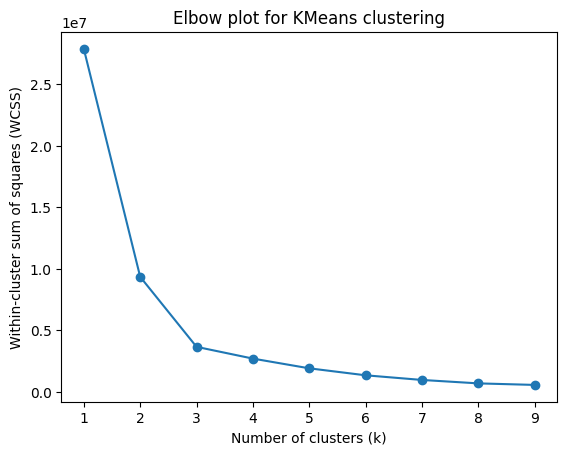

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate some random data
# Define the range of k values to test
k_values = range(1, 10)

# Initialize empty list to store within-cluster sum of squares (WCSS)
wcss = []

# Loop over k values and fit KMeans model for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_long_lat.values)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each k value
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow plot for KMeans clustering')
plt.show()

From the above elbow plot we clearly see that the Kmeans cluster is 3 or 4 and for verification we will check that again by using silhouute Score

##Silhoutte Score :


In [124]:
n_clusters = [3, 4, 5, 6,7,8,9,10,11,12,13]
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_long_lat.values)
    score = silhouette_score(df_long_lat.values, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K,score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 3 clusters the silhouette score is 0.7525907768981563)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 4 clusters the silhouette score is 0.7298424817678799)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 5 clusters the silhouette score is 0.7336232355347667)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 6 clusters the silhouette score is 0.7476100629833585)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 7 clusters the silhouette score is 0.7398595546753012)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 8 clusters the silhouette score is 0.7805219731323972)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 9 clusters the silhouette score is 0.7832214285051785)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 10 clusters the silhouette score is 0.7531811512464704)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 11 clusters the silhouette score is 0.7649434283576677)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 12 clusters the silhouette score is 0.7490215761985078)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 13 clusters the silhouette score is 0.7579750359538543)


In [125]:
new_clusters = KMeans(n_clusters = 3, random_state = 10)
new_clusters.fit(df_long_lat.values)
# append the cluster label for each point in the dataframe 'df_cust'
df_model_3['Cluster'] = new_clusters.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [126]:
df_model_3['Cluster'] = df_model_3['Cluster'].astype(object)

In [127]:
target = pd.crosstab(df_model_3["Cluster"],df_model_3["Late_delivery_risk"]).values
print("---Dependency with target: ",stats.chi2_contingency(target)[1])

---Dependency with target:  0.15569327981055853


In [128]:
en_cols = df_model_3.columns.drop(["Late_delivery_risk","Shipping Mode","Type"])
Tar_encode_dict = Target_encode_test(df_model_3,en_cols)
map_categories_encode(df_model_3,Tar_encode_dict)
df_final = pd.get_dummies(df_model_3,drop_first=True)
x = df_final.drop("Late_delivery_risk",axis=1)
y = df_final["Late_delivery_risk"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=34)
print(f"x_train {x_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

x_train (40000, 12)
x_test (10000, 12)
y_train (40000,)
y_test (10000,)


##SUMMARY FOR ABOVE ALL MODELS FOR SECOND ENCODING :

In [129]:
# checking for all vanila model
clfs = {
      'RandomForest':RandomForestClassifier(),
      'AdaBoost': AdaBoostClassifier(),
      'GradientBoost': GradientBoostingClassifier(),
      'XGBoost': XGBClassifier(),
        'BaggingRF': BaggingClassifier(base_estimator=RandomForestClassifier()),
       'BaggingAda': BaggingClassifier(base_estimator=AdaBoostClassifier()),
       'BaggingGB': BaggingClassifier(base_estimator=GradientBoostingClassifier()),
       'BaggingXGB': BaggingClassifier(base_estimator=XGBClassifier()),
        'GaussianNB': GaussianNB()}

model_report = pd.DataFrame(columns = ["Model","Accuracy_score","Recall_score","F1_score"])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train,y_train)
    y_pred_prob = clf.predict(x_test)
    y_pred = [1 if i > 0.5 else 0 for i in y_pred_prob]
    print('Fitting the model .......', clf_name)
    t= pd.Series({
        'Model': clf_name,
        'Accuracy_score': accuracy_score(y_test, y_pred),
        'Recall_score':recall_score(y_test,y_pred),
        'F1_score': f1_score(y_test, y_pred)
    })
    model_report = model_report.append(t,ignore_index=True)
#Focusing mainly on recall score so we sort by recall score to get our best model
model_report = model_report.sort_values(by='Recall_score', ascending=False)
model_report

Fitting the model ....... RandomForest


<ipython-input-129-d52d0bcd79ff>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)


Fitting the model ....... AdaBoost


<ipython-input-129-d52d0bcd79ff>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)


Fitting the model ....... GradientBoost


<ipython-input-129-d52d0bcd79ff>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)


Fitting the model ....... XGBoost


<ipython-input-129-d52d0bcd79ff>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fitting the model ....... BaggingRF


<ipython-input-129-d52d0bcd79ff>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fitting the model ....... BaggingAda


<ipython-input-129-d52d0bcd79ff>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fitting the model ....... BaggingGB


<ipython-input-129-d52d0bcd79ff>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fitting the model ....... BaggingXGB
Fitting the model ....... GaussianNB


<ipython-input-129-d52d0bcd79ff>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)
<ipython-input-129-d52d0bcd79ff>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report = model_report.append(t,ignore_index=True)


,Model,Accuracy_score,Recall_score,F1_score
8,GaussianNB,0.7446,0.957318,0.803629
0,RandomForest,0.8880,0.899615,0.897642
4,BaggingRF,0.8843,0.895036,0.894135
1,AdaBoost,0.8503,0.863162,0.862925
7,BaggingXGB,0.8592,0.863162,0.870015
3,XGBoost,0.8570,0.862979,0.868227
6,BaggingGB,0.8538,0.860414,0.865328
2,GradientBoost,0.8538,0.857483,0.864930
5,BaggingAda,0.8504,0.854918,0.861865


Models 1 gives better results than Models 2 and Models 3

In Models 1, Xg boost is best model and generalised model.

##Hyperparameter Tunning of XG BOOST :


In [132]:
import xgboost as xgb

In [133]:
xgb_model = xgb.XGBClassifier()
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters and their ranges for RandomizedSearchCV
param_distributions = {'n_estimators': np.arange(100,500,100),

                       'max_depth': ["none",1,2,3,4,5],
                       'subsample': np.arange(0.5, 1.0, 0.05),
                       'gamma': np.arange(0, 5)}

# Create the RandomizedSearchCV object
rs = RandomizedSearchCV(xgb_model, param_distributions, cv=5, n_iter=50, n_jobs=-1, random_state=42)

# Fit the model with the training data
rs.fit(x_train, y_train.values.ravel())

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", rs.best_params_)
print("Best Score: ", rs.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
 

Best Hyperparameters:  {'subsample': 0.9500000000000004, 'n_estimators': 100, 'max_depth': 3, 'gamma': 3}
Best Score:  0.8574999999999999


*   Best Hyperparameters: {'n_estimators': 400, 'max_depth': 4, 'gamma': 1}

Test Recall 0.8611467301703609
Train Recall 0.8647442029975855


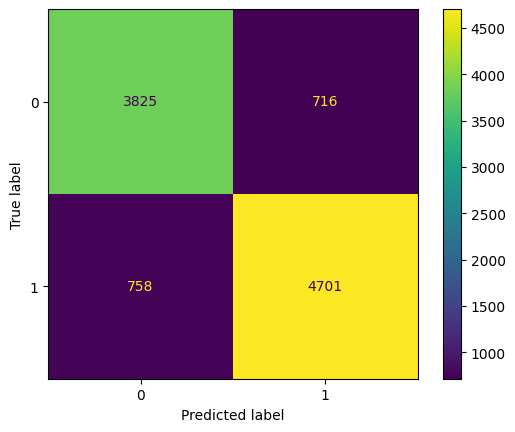

In [134]:
XGB = XGBClassifier(n_estimators = 400,max_depth = 4,gamma=1)
XGB.fit(x_train,y_train)
y_pred_test = XGB.predict(x_test)
y_pred_train = XGB.predict(x_train)
print("Test Recall", recall_score(y_test,y_pred_test))
print("Train Recall", recall_score(y_train,y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)
plt.show()

In [135]:
y_pred_prob_test = XGB.predict(x_test)
y_pred_test = [1 if i > 0.5 else 0 for i in y_pred_prob_test]
y_pred_prob_train = XGB.predict(x_train)
y_pred_train = [1 if i > 0.5 else 0 for i in y_pred_prob_train]

print('Train_Accuracy_score',accuracy_score(y_train,y_pred_train))
print('Test_Accuracy_score',accuracy_score(y_test,y_pred_test))
print('Train_Recall_score',recall_score(y_train,y_pred_train))
print('Test_Recall_score',recall_score(y_test,y_pred_test))

Train_Accuracy_score 0.860375
Test_Accuracy_score 0.8526
Train_Recall_score 0.8647442029975855
Test_Recall_score 0.8611467301703609


##Feature Importance of XG Boost Classifier :

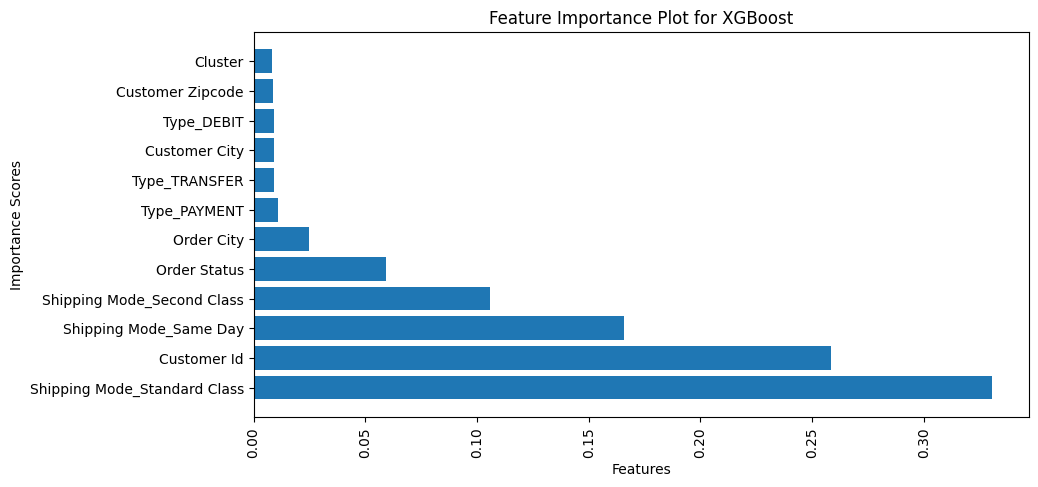

In [136]:
XGB = XGBClassifier()
XGB.fit(x_train,y_train)

importance_scores = XGB.feature_importances_

feature_names = list(x_train.columns)
sorted_indices = importance_scores.argsort()[::-1]
importance_scores_sorted = importance_scores[sorted_indices]
feature_names_sorted = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(10, 5))
plt.barh(feature_names_sorted, importance_scores_sorted)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Scores")
plt.title("Feature Importance Plot for XGBoost")
plt.show()

##business Interpretation :


*   Here we got the consistent result for the Xg Boost after hyper parameter tunning and for business Interpretation recall is very important for us it like actual we late dilvery risk(1) but we predict not late delivery risk (0) so it is False negative that why we want recall score is good.
* Shipping mode: The shipping mode (standard class, same day, and second class) is the most important feature in predicting the risk of late delivery. This suggests that the choice of shipping mode plays a significant role in determining whether an order will be delivered on time or not. Businesses may need to focus on optimizing their shipping processes for different shipping modes to reduce the risk of delays and improve customer satisfaction.
* **Customer ID**: The customer ID is the second most important feature in predicting the risk of late delivery. This suggests that certain customers are more likely to experience delivery delays than others

